# Documentação

!pip install yfinance

### Artigo original:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Uso do Auto-ARIMA:
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

### R2Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np

from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [14]:
def get_finance_data(ticker, period='1y', interval='1d'):
    '''
    Função para capturar os dados dos ativos, acrescentar ".SA" no final do ticker para ativos 
    negociados na Bovespa, exemplo "PETR4.SA".
    Exemplo url base da API: https://query1.finance.yahoo.com/v7/finance/options/PETR4.SA?date=20201222
    Exemplo url scrape da API: https://finance.yahoo.com/quote/PETR4.SA
    
    Parameters
    ----------
    period: default '1y', periodos validos: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    inteval: default '1d', intervalos validos: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1d, 5d, 1wk, 1mo, 3mo.
    '''
    
    google = yf.Ticker(ticker)
    
    df = google.history(period=period, interval=interval)
#     df['date'] = pd.to_datetime(df.index).time
#     df.set_index('date', inplace=True)
    return df


def get_forecast(df, ar, i, ma , col_ref='Low'):
    # Assuming that we've properly trained the model before and that the 
    # hyperparameters are correctly tweaked, we use the full dataset to fit
    y = df[col_ref].values
    model = ARIMA(y, order=(ar, i, ma)).fit()
    forecast = model.forecast(steps=10)[0]

    # Returning the last real data and the forecast for the next minute
    return (y[len(y)-1], forecast)

In [32]:
df = get_finance_data('RBBV11.SA')[:-50]

get_forecast(df, 5,1,0, col_ref='Low')

(91.55000305175781,
 array([91.50832987, 91.60612098, 91.916444  , 91.76900998, 91.54064335,
        91.69759696, 91.79429255, 91.78002281, 91.70686819, 91.75075455]))

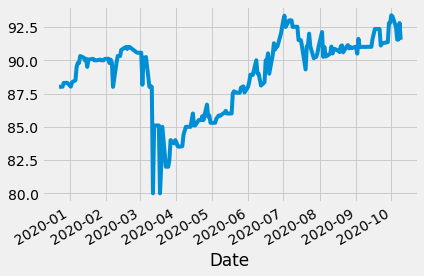

In [30]:
df['Low'].plot()

In [10]:
df['Close'][-1]

103.27999877929688

In [ ]:
ativo = yf.Ticker('RBBV11.SA')

In [ ]:
ativo.get_dividends()

In [17]:
df = google.history(period=period, interval=interval)

NameError: name 'google' is not defined